In [79]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as cx
from geopandas.tools import overlay
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Reading In All Data

In [80]:
ufo = gpd.read_file('nuforc_reports.csv', crs = 'EPSG:4326')
ufo.head()

,summary,country,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,geometry
0,MADAR Node 100,USA,Mountlake Terrace,WA,2019-06-23T18:53:00,,,Occurred : 6/23/2019 18:53 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/147/S...,MADAR Node 100,2019-06-27T00:00:00,47.7941,-122.3066,None
1,Steady flashing object with three lights hover...,USA,Hamden,CT,2019-06-23T20:00:00,light,5 hours,Occurred : 6/23/2019 20:00 (Entered as : 6/23...,http://www.nuforc.org/webreports/reports/147/S...,Steady flashing object with three lights hover...,2019-06-27T00:00:00,41.37394080000001,-72.92132480000001,None
2,"Group of several orange lights, seemingly circ...",USA,Charlottesville,VA,2019-06-20T23:28:00,circle,15 seconds,Occurred : 6/20/2019 23:28 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/146/S...,"Group of several orange lights, seemingly circ...",2019-06-27T00:00:00,38.05596818950931,-78.4944820642978,None
3,Dropped in flashed a few times and shot off 5 ...,USA,Lincoln Park,MI,2019-06-21T00:00:00,light,2 minutes,Occurred : 6/21/2019 00:00 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/146/S...,Dropped in flashed a few times and shot off 5 ...,2019-06-27T00:00:00,42.2385,-83.1783,None
4,"Location: While traveling in a TGV, from Lille...",France,Douai (France),,2019-06-07T20:00:00,cigar,5 minutes,Occurred : 6/7/2019 20:00 (Entered as : 06/07...,http://www.nuforc.org/webreports/reports/146/S...,"Location: While traveling in a TGV, from Lill...",2019-06-27T00:00:00,,,None


In [81]:
ufo = ufo.dropna(subset=['city_latitude','city_longitude'])

ufo['latitude'] = pd.to_numeric(ufo['city_latitude'], errors='coerce')
ufo['longitude'] = pd.to_numeric(ufo['city_longitude'], errors='coerce')

geometry1 = [Point(lon,lat)for lon, lat in zip (ufo['longitude'],ufo['latitude'])]


In [82]:
ufo = gpd.GeoDataFrame(ufo, geometry = geometry1, crs = 'EPSG:4326')
ufo.head()

,summary,country,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,geometry,latitude,longitude
0,MADAR Node 100,USA,Mountlake Terrace,WA,2019-06-23T18:53:00,,,Occurred : 6/23/2019 18:53 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/147/S...,MADAR Node 100,2019-06-27T00:00:00,47.7941,-122.3066,POINT (-122.30660 47.79410),47.794100,-122.306600
1,Steady flashing object with three lights hover...,USA,Hamden,CT,2019-06-23T20:00:00,light,5 hours,Occurred : 6/23/2019 20:00 (Entered as : 6/23...,http://www.nuforc.org/webreports/reports/147/S...,Steady flashing object with three lights hover...,2019-06-27T00:00:00,41.37394080000001,-72.92132480000001,POINT (-72.92132 41.37394),41.373941,-72.921325
2,"Group of several orange lights, seemingly circ...",USA,Charlottesville,VA,2019-06-20T23:28:00,circle,15 seconds,Occurred : 6/20/2019 23:28 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/146/S...,"Group of several orange lights, seemingly circ...",2019-06-27T00:00:00,38.05596818950931,-78.4944820642978,POINT (-78.49448 38.05597),38.055968,-78.494482
3,Dropped in flashed a few times and shot off 5 ...,USA,Lincoln Park,MI,2019-06-21T00:00:00,light,2 minutes,Occurred : 6/21/2019 00:00 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/146/S...,Dropped in flashed a few times and shot off 5 ...,2019-06-27T00:00:00,42.2385,-83.1783,POINT (-83.17830 42.23850),42.238500,-83.178300
4,"Location: While traveling in a TGV, from Lille...",France,Douai (France),,2019-06-07T20:00:00,cigar,5 minutes,Occurred : 6/7/2019 20:00 (Entered as : 06/07...,http://www.nuforc.org/webreports/reports/146/S...,"Location: While traveling in a TGV, from Lill...",2019-06-27T00:00:00,,,POINT EMPTY,NaN,NaN


In [83]:
ufo = ufo[~ufo['geometry'].is_empty]
ufo.head()

,summary,country,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,geometry,latitude,longitude
0,MADAR Node 100,USA,Mountlake Terrace,WA,2019-06-23T18:53:00,,,Occurred : 6/23/2019 18:53 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/147/S...,MADAR Node 100,2019-06-27T00:00:00,47.7941,-122.3066,POINT (-122.30660 47.79410),47.794100,-122.306600
1,Steady flashing object with three lights hover...,USA,Hamden,CT,2019-06-23T20:00:00,light,5 hours,Occurred : 6/23/2019 20:00 (Entered as : 6/23...,http://www.nuforc.org/webreports/reports/147/S...,Steady flashing object with three lights hover...,2019-06-27T00:00:00,41.37394080000001,-72.92132480000001,POINT (-72.92132 41.37394),41.373941,-72.921325
2,"Group of several orange lights, seemingly circ...",USA,Charlottesville,VA,2019-06-20T23:28:00,circle,15 seconds,Occurred : 6/20/2019 23:28 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/146/S...,"Group of several orange lights, seemingly circ...",2019-06-27T00:00:00,38.05596818950931,-78.4944820642978,POINT (-78.49448 38.05597),38.055968,-78.494482
3,Dropped in flashed a few times and shot off 5 ...,USA,Lincoln Park,MI,2019-06-21T00:00:00,light,2 minutes,Occurred : 6/21/2019 00:00 (Entered as : 06/2...,http://www.nuforc.org/webreports/reports/146/S...,Dropped in flashed a few times and shot off 5 ...,2019-06-27T00:00:00,42.2385,-83.1783,POINT (-83.17830 42.23850),42.238500,-83.178300
5,"Llike a star at first glance, got brighter and...",USA,San jacinto,CA,2019-07-06T00:30:00,sphere,25 seconds,Occurred : 7/6/2019 00:30 (Entered as : 7/6/1...,http://www.nuforc.org/webreports/reports/147/S...,"Looked like a star at first glance, got bright...",2019-07-12T00:00:00,33.79409344262295,-116.94998852459017,POINT (-116.94999 33.79409),33.794093,-116.949989


In [84]:
counties = gpd.read_file('counties.geojson', crs = 'EPSG:4326')
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,075,00277302,0500000US06075,06075,San Francisco,06,121485107,479107241,"POLYGON ((-122.51198 37.77113, -122.46540 37.8..."
1,25,025,00606939,0500000US25025,25025,Suffolk,06,150855462,160479920,"POLYGON ((-71.19115 42.28306, -71.15689 42.330..."
2,31,007,00835826,0500000US31007,31007,Banner,06,1932676697,397069,"POLYGON ((-104.05283 41.69795, -103.37039 41.6..."
3,37,181,01008591,0500000US37181,37181,Vance,06,653705784,42187365,"POLYGON ((-78.49778 36.51448, -78.45728 36.541..."
4,48,421,01383996,0500000US48421,48421,Sherman,06,2390651189,428754,"POLYGON ((-102.16246 36.50033, -102.03234 36.5..."


In [85]:
counties_df = gpd.GeoDataFrame(counties,crs = 'EPSG:4326')

In [86]:
bigfoot = gpd.read_file('bfro_reports_geocoded.csv', crs = 'EPSG:4326')
bigfoot.head()

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,precip_probability,precip_type,pressure,summary,conditions,uv_index,visibility,wind_bearing,wind_speed,geometry
0,I am not sure how relevant this report will be...,"We were on our way to Rapid City, so we were h...",Washakie County,Wyoming,Summer,,,,,798.0,...,,,,,,,,,,None
1,I don't know if what I saw was two bigfoots or...,"Heading to the deep mine Poca #2, the airshaft...",Wyoming County,West Virginia,Winter,Report 13237: Daylight sighting near an abando...,37.58135,-81.29745,2005-12-03,13237.0,...,100.0,"['rain', 'snow']",1018.7,Partly cloudy throughout the day with late aft...,"Snow, Rain, Partially cloudy",,9.3,168.1,17.1,None
2,"My family and I went to Ludlow, Vermont for Co...",It's off Rt 100 outside of Ludlow Vermont. It ...,Windsor County,Vermont,Fall,Report 13285: Evening sighting by motorists on...,43.4654,-72.7051,2005-10-08,13285.0,...,100.0,['rain'],1011.8,Cloudy skies throughout the day with a chance ...,"Rain, Overcast",,5.0,356.2,7.6,None
3,It was spring break 1984 and I was 16 at the t...,"Wythe county Virginia near Wytheville, looking...",Wythe County,Virginia,Spring,"Report 2285: Boy sees ""Bigfoot"" in the woods w...",37.22647,-81.09017,1984-04-08,2285.0,...,0.0,,1020.9,Partly cloudy throughout the day.,Partially cloudy,,13.0,107.3,11.5,None
4,It was the winter of 1996 and we were on our w...,"Hwy 182, Wood County Between Quitman, Texas an...",Wood County,Texas,Winter,Report 2048: Night time road crossing observation,32.7943,-95.5425,1996-12-22,2048.0,...,0.0,,,Partly cloudy throughout the day.,Partially cloudy,,10.5,180.4,20.8,None


In [87]:
bigfoot = bigfoot.dropna(subset=['latitude','longitude'])

In [88]:
bigfoot['latitude'] = pd.to_numeric(bigfoot['latitude'], errors='coerce')
bigfoot['longitude'] = pd.to_numeric(bigfoot['longitude'], errors='coerce')

geometry = [Point(lon,lat)for lon, lat in zip (bigfoot['longitude'],bigfoot['latitude'])]

In [89]:
bigfoot = gpd.GeoDataFrame(bigfoot, geometry = geometry, crs = 'EPSG:4326')
bigfoot.head()

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,precip_probability,precip_type,pressure,summary,conditions,uv_index,visibility,wind_bearing,wind_speed,geometry
0,I am not sure how relevant this report will be...,"We were on our way to Rapid City, so we were h...",Washakie County,Wyoming,Summer,,NaN,NaN,,798.0,...,,,,,,,,,,POINT EMPTY
1,I don't know if what I saw was two bigfoots or...,"Heading to the deep mine Poca #2, the airshaft...",Wyoming County,West Virginia,Winter,Report 13237: Daylight sighting near an abando...,37.58135,-81.29745,2005-12-03,13237.0,...,100.0,"['rain', 'snow']",1018.7,Partly cloudy throughout the day with late aft...,"Snow, Rain, Partially cloudy",,9.3,168.1,17.1,POINT (-81.29745 37.58135)
2,"My family and I went to Ludlow, Vermont for Co...",It's off Rt 100 outside of Ludlow Vermont. It ...,Windsor County,Vermont,Fall,Report 13285: Evening sighting by motorists on...,43.46540,-72.70510,2005-10-08,13285.0,...,100.0,['rain'],1011.8,Cloudy skies throughout the day with a chance ...,"Rain, Overcast",,5.0,356.2,7.6,POINT (-72.70510 43.46540)
3,It was spring break 1984 and I was 16 at the t...,"Wythe county Virginia near Wytheville, looking...",Wythe County,Virginia,Spring,"Report 2285: Boy sees ""Bigfoot"" in the woods w...",37.22647,-81.09017,1984-04-08,2285.0,...,0.0,,1020.9,Partly cloudy throughout the day.,Partially cloudy,,13.0,107.3,11.5,POINT (-81.09017 37.22647)
4,It was the winter of 1996 and we were on our w...,"Hwy 182, Wood County Between Quitman, Texas an...",Wood County,Texas,Winter,Report 2048: Night time road crossing observation,32.79430,-95.54250,1996-12-22,2048.0,...,0.0,,,Partly cloudy throughout the day.,Partially cloudy,,10.5,180.4,20.8,POINT (-95.54250 32.79430)


In [90]:
bigfoot = bigfoot[~bigfoot['geometry'].is_empty]
bigfoot.head()

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,precip_probability,precip_type,pressure,summary,conditions,uv_index,visibility,wind_bearing,wind_speed,geometry
1,I don't know if what I saw was two bigfoots or...,"Heading to the deep mine Poca #2, the airshaft...",Wyoming County,West Virginia,Winter,Report 13237: Daylight sighting near an abando...,37.58135,-81.29745,2005-12-03,13237.0,...,100.0,"['rain', 'snow']",1018.7,Partly cloudy throughout the day with late aft...,"Snow, Rain, Partially cloudy",,9.3,168.1,17.1,POINT (-81.29745 37.58135)
2,"My family and I went to Ludlow, Vermont for Co...",It's off Rt 100 outside of Ludlow Vermont. It ...,Windsor County,Vermont,Fall,Report 13285: Evening sighting by motorists on...,43.46540,-72.70510,2005-10-08,13285.0,...,100.0,['rain'],1011.8,Cloudy skies throughout the day with a chance ...,"Rain, Overcast",,5.0,356.2,7.6,POINT (-72.70510 43.46540)
3,It was spring break 1984 and I was 16 at the t...,"Wythe county Virginia near Wytheville, looking...",Wythe County,Virginia,Spring,"Report 2285: Boy sees ""Bigfoot"" in the woods w...",37.22647,-81.09017,1984-04-08,2285.0,...,0.0,,1020.9,Partly cloudy throughout the day.,Partially cloudy,,13.0,107.3,11.5,POINT (-81.09017 37.22647)
4,It was the winter of 1996 and we were on our w...,"Hwy 182, Wood County Between Quitman, Texas an...",Wood County,Texas,Winter,Report 2048: Night time road crossing observation,32.79430,-95.54250,1996-12-22,2048.0,...,0.0,,,Partly cloudy throughout the day.,Partially cloudy,,10.5,180.4,20.8,POINT (-95.54250 32.79430)
7,"While attending U.R.I in the Fall of 1974,I wo...","Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45000,-71.50000,1974-09-20,6496.0,...,0.0,,1020.6,Cloudy skies throughout the day.,Overcast,,2.6,196.6,15.0,POINT (-71.50000 41.45000)


### Plotting

Query the counties dataframe to get only the counties for Maryland

In [91]:
counties_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,075,00277302,0500000US06075,06075,San Francisco,06,121485107,479107241,"POLYGON ((-122.51198 37.77113, -122.46540 37.8..."
1,25,025,00606939,0500000US25025,25025,Suffolk,06,150855462,160479920,"POLYGON ((-71.19115 42.28306, -71.15689 42.330..."
2,31,007,00835826,0500000US31007,31007,Banner,06,1932676697,397069,"POLYGON ((-104.05283 41.69795, -103.37039 41.6..."
3,37,181,01008591,0500000US37181,37181,Vance,06,653705784,42187365,"POLYGON ((-78.49778 36.51448, -78.45728 36.541..."
4,48,421,01383996,0500000US48421,48421,Sherman,06,2390651189,428754,"POLYGON ((-102.16246 36.50033, -102.03234 36.5..."


<AxesSubplot:>

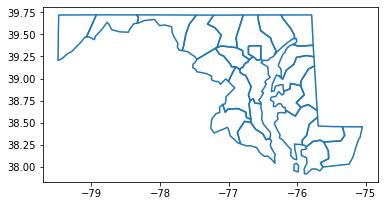

In [92]:
counties_df = counties_df[counties_df['STATEFP']== '24']
counties_boundary = counties_df.boundary
counties_boundary.plot()

In [93]:
bigfoot = bigfoot.to_crs('EPSG:4326')
ufo = ufo.to_crs('EPSG:4326')

<AxesSubplot:>

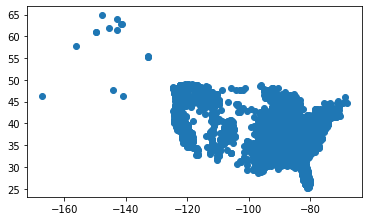

In [94]:
bigfoot.plot()

In [95]:
counties_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 24 entries, 259 to 3188
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   24 non-null     object  
 1   COUNTYFP  24 non-null     object  
 2   COUNTYNS  24 non-null     object  
 3   AFFGEOID  24 non-null     object  
 4   GEOID     24 non-null     object  
 5   NAME      24 non-null     object  
 6   LSAD      24 non-null     object  
 7   ALAND     24 non-null     int64   
 8   AWATER    24 non-null     int64   
 9   geometry  24 non-null     geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 2.1+ KB


In [96]:
counties_df = gpd.GeoDataFrame(counties_df,crs = 'EPSG:4326')

<AxesSubplot:>

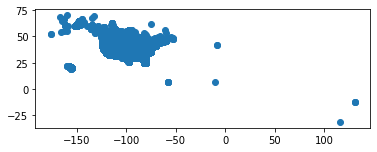

In [97]:
ufo.plot()

Clip both the bigfoot and ufo data by the counties data to get only the Maryland results

In [98]:
bigfoot_clip = bigfoot.clip(counties_df)
ufo_clip = ufo.clip(counties_df)

In [99]:
ufo_clip.head()

,summary,country,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,geometry,latitude,longitude
107041,White ball of light traveled in a NW direction...,USA,Lexington Park,MD,2015-10-25T20:50:00,light,2 seconds,Occurred : 10/25/2015 20:50 (Entered as : 10/...,http://www.nuforc.org/webreports/reports/123/S...,White ball of light traveled in a NW direction...,2015-10-29T00:00:00,38.2573,-76.4498,POINT (-76.44980 38.25730),38.2573,-76.4498
104652,Black Triangle UFO silently cruising over at 4...,USA,Lexington Park,MD,2015-03-12T23:40:00,triangle,3 minutes,Occurred : 3/12/2015 23:40 (Entered as : 03/1...,http://www.nuforc.org/webreports/reports/117/S...,Black Triangle UFO silently cruising over at 4...,2015-03-13T00:00:00,38.2573,-76.4498,POINT (-76.44980 38.25730),38.2573,-76.4498
109134,Diamond with no sides Next to Maryland Navel ...,USA,Lexington Park,MD,2014-10-23T23:00:00,diamond,9-10 seconds,Occurred : 10/23/2014 23:00 (Entered as : 10/...,http://www.nuforc.org/webreports/reports/126/S...,diamond with no sides Next to Maryland Navel ...,2016-04-15T00:00:00,38.2573,-76.4498,POINT (-76.44980 38.25730),38.2573,-76.4498
87493,"Bright orb shape, travels slightly then vanishes.",USA,Great Mills,MD,2013-08-01T22:00:00,sphere,3 minutes,Occurred : 8/1/2013 22:00 (Entered as : 08/01...,http://www.nuforc.org/webreports/reports/101/S...,"Bright orb shape, travels slightly then vanish...",2013-09-09T00:00:00,38.2674,-76.4954,POINT (-76.49540 38.26740),38.2674,-76.4954
127683,Tonight it was the usual ball of light that di...,USA,Pocomoke City,MD,2020-04-22T23:00:00,light,2 minutes,Occurred : 4/22/2020 23:00 (Entered as : 04/2...,http://www.nuforc.org/webreports/reports/155/S...,Tonight it was the usual ball of light that di...,2020-05-15T00:00:00,38.0713,-75.55,POINT (-75.55000 38.07130),38.0713,-75.5500


Plot a dot map where bigfoor sightings are brown and ufo sightings are green

Text(0.5, 1.0, 'Bigfoot and UFO Sightings in Maryland')

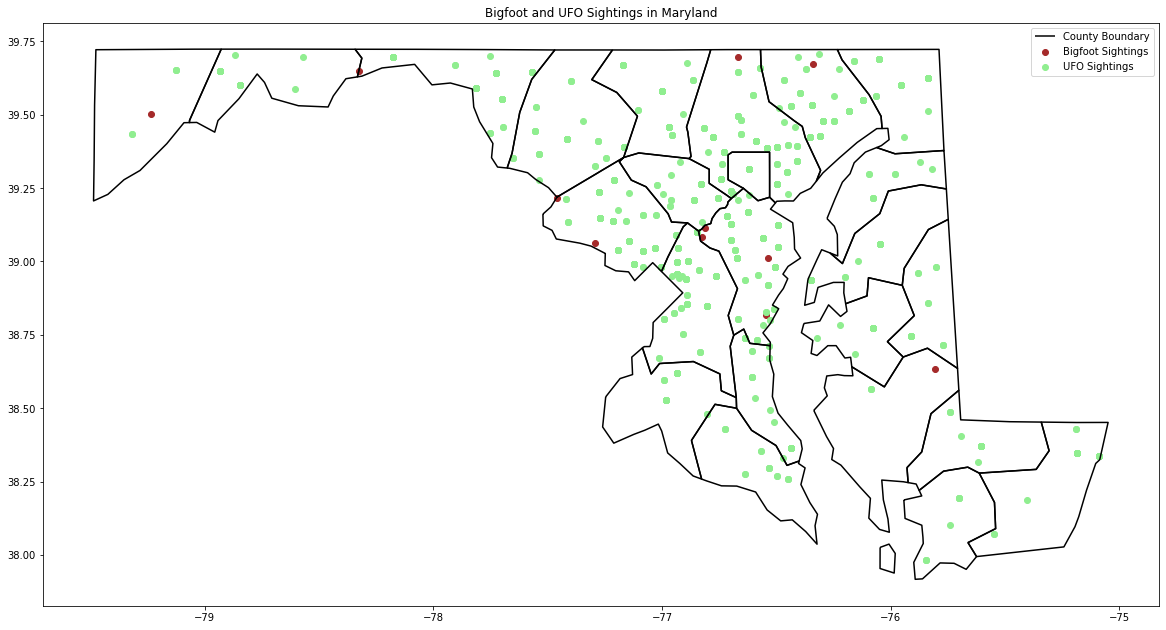

In [105]:
fig, ax = plt.subplots(figsize = (20,20))
counties_boundary.plot(ax=ax,color = 'black')
bigfoot_clip.plot(ax=ax,color = 'brown')
ufo_clip.plot(ax=ax, color = 'lightgreen')
plt.legend(['County Boundary','Bigfoot Sightings', 'UFO Sightings'])
plt.title('Bigfoot and UFO Sightings in Maryland')

### Creating Choropleth Map For UFO and Bigfoot

In [112]:
counties_boundary = gpd.GeoDataFrame(counties_df, geometry=counties_df.geometry)


Spatially join the counties boundary with the bigfoot data which will help us be able to plot a choropleth map. Calculate a count per county using the value counts

In [114]:
joined_b = gpd.sjoin(bigfoot_clip, counties_boundary, how = 'inner', op = 'within')

count_per_bigfoot = joined_b['COUNTYFP'].value_counts().reset_index()
count_per_bigfoot.columns = ['COUNTYFP','COUNT']
count_per_bigfoot.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3280: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,COUNTYFP,COUNT
0,003,4
1,031,2
2,019,1
3,023,1
4,043,1


Spatially join the counties boundary with the ufo data which will help us be able to plot the choropleth map. Calculate a count per county using the value counts

In [115]:
joined_u = gpd.sjoin(ufo_clip, counties_boundary, how = 'inner', op = 'within')

count_per_ufo = joined_u['COUNTYFP'].value_counts().reset_index()
count_per_ufo.columns = ['COUNTYFP','COUNT']
count_per_ufo.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3280: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,COUNTYFP,COUNT
0,031,193
1,003,183
2,510,160
3,005,154
4,033,125


In [116]:
counties_boundary = gpd.GeoDataFrame(counties_boundary)
counties_boundary.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
259,24,023,01711058,0500000US24023,24023,Garrett,06,1681276216,22324651,"POLYGON ((-79.48437 39.34430, -79.48237 39.531..."
736,24,011,00595737,0500000US24011,24011,Caroline,06,827350251,16777064,"POLYGON ((-76.01443 38.72646, -75.89677 38.815..."
796,24,005,01695314,0500000US24005,24005,Baltimore,06,1549830329,215909963,"POLYGON ((-76.89310 39.45740, -76.80430 39.675..."
835,24,047,01668802,0500000US24047,24047,Worcester,06,1212832597,586845178,"POLYGON ((-75.66183 38.04185, -75.54087 38.089..."
961,24,009,01676636,0500000US24009,24009,Calvert,06,552178309,341560885,"POLYGON ((-76.68636 38.74847, -76.64275 38.769..."


In [117]:
merged_bigfoot = counties_boundary.merge(count_per_bigfoot, on = 'COUNTYFP', how = 'left')

In [118]:
merged_bigfoot = merged_bigfoot.fillna(0)

In [119]:
merged_ufo = counties_boundary.merge(count_per_ufo, on = 'COUNTYFP', how = 'left')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/contextily/tile.py:614: UserWarning: The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 16).
  warnings.warn(msg)


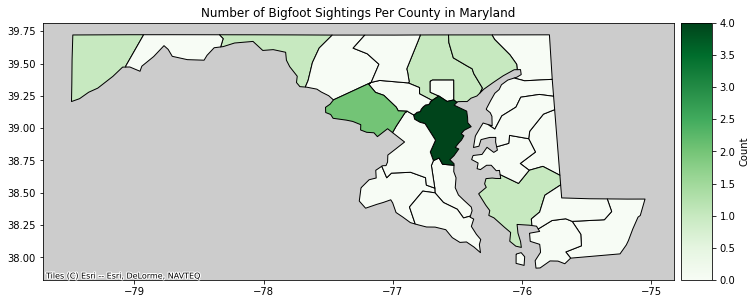

In [120]:
fig,ax = plt.subplots(figsize = (12,10))
merged_bigfoot.plot(ax=ax, column = 'COUNT',cmap = 'Greens',edgecolor = 'black')
cx.add_basemap(ax, source= cx.providers.Esri.WorldGrayCanvas)
plt.title('Number of Bigfoot Sightings Per County in Maryland')

min_value = merged_bigfoot['COUNT'].min()
max_value = merged_bigfoot['COUNT'].max()

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=min_value, vmax=max_value)), cax=cax)
cbar.set_label('Count')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/contextily/tile.py:614: UserWarning: The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 16).
  warnings.warn(msg)


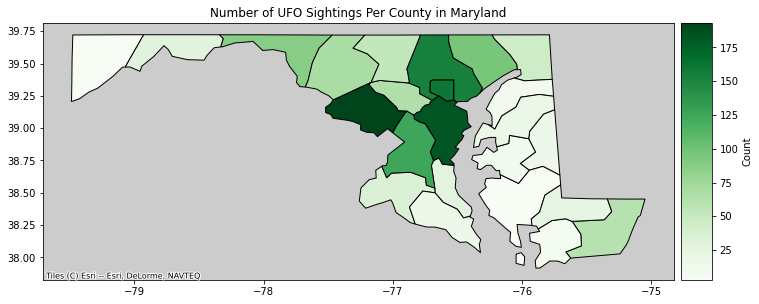

In [121]:
fig,ax = plt.subplots(figsize = (12,10))
merged_ufo.plot(ax=ax, column = 'COUNT',cmap = 'Greens',edgecolor = 'black')
cx.add_basemap(ax, source= cx.providers.Esri.WorldGrayCanvas)
plt.title('Number of UFO Sightings Per County in Maryland')

min_value = merged_ufo['COUNT'].min()
max_value = merged_ufo['COUNT'].max()

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=min_value, vmax=max_value)), cax=cax)
cbar.set_label('Count')